<div style="align-items: center; justify-content: center; flex-wrap: wrap;">
<center><br> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Twitter_and_X_logos.svg/485px-Twitter_and_X_logos.svg.png?20230724093320" style="width: 150px;"></center><br>
</div>

<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 6rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #24A3F1;">TM Project |</span> <span style="color: #2a2a83;">Stock Market Sentiment Tweets Analysis</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Spring Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Filipa Pereira, 20240509</div>
            <div>João Henriques, 20240499</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>

# <span style="color: #ffffff;">1 & 2 | Business & Data Understanding</span>

<div style="background: linear-gradient(to right, #24A3F1, #0B62A3, #113d7c, #000000);
            padding: 15px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 100px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>1 & 2 | Business & Data Understanding</b></h1></center>
</div>

<br><br>


### **📝 Project Overview**

This project focuses on understanding how tweets reflect stock market sentiment. Market sentiment, often described as "bullish" (expecting prices to rise) or "bearish" (expecting prices to fall), influences investor behavior. This work involves building a tool to automatically classify tweets based on the sentiment they express towards the market.

### **🎯 Project Goals**

The primary goal is to develop a Natural Language Processing (NLP) model using Python. This model needs to read a tweet and decide if it shows a Bearish (coded as **0**), Bullish (coded as **1**), or Neutral (coded as **2**) attitude. We will use libraries like NLTK, Scikit-learn, and Hugging Face to build and test this classification model.

### **🎲 Dataset**

- **Dataset Name**: Stock Market Sentiment Tweets (derived name)
- **Dataset Description**: The data consists of tweets related to the stock market. It's split into a training file (`train.csv`) and a testing file (`test.csv`). The training file contains the tweet text and its corresponding sentiment label (0, 1, or 2). The test file contains tweet text and an ID, but no labels; the task is to predict these missing labels.
- **Dataset Source**: Provided for this course project.
- **Dataset Size**: The training set (`train.csv`) contains 9543 tweets. The test set (`test.csv`) contains 2388 tweets.
- **Dataset Format**: Comma-Separated Values (.csv)

### **🔎 Dataset Attributes**

Our analysis uses datasets with the following structures:

<center>

<b>Table 1 | </b> `train.csv` Attributes with Descriptions. <br>

<br>

|       | **Field** | **Explanation**                                                   | **Type** |
|-------|-----------|-------------------------------------------------------------------|----------|
| **1** | `text`    | The actual content of the tweet.                                  | Text     |
| **2** | `label`   | The sentiment category: 0 (Bearish), 1 (Bullish), or 2 (Neutral). | Integer  |

</center>

<br>

<center>

<b>Table 2 | </b> `test.csv` Attributes with Descriptions. <br>

<br>

|       | **Field** | **Explanation**                                                              | **Type** |
|-------|-----------|------------------------------------------------------------------------------|----------|
| **1** | `id`      | A unique identifier for each tweet in the test set.                          | Integer  |
| **2** | `text`    | The actual content of the tweet for which sentiment needs to be predicted. | Text     |

</center>

<br><br>

<div style="background: linear-gradient(to right, #24A3F1, #0B62A3, #113d7c, #000000);
            padding: 7px; color: white; border-radius: 500px; text-align: center;">
</div>

## 📚 **Libraries Import**

In [1]:
# # Source to install PyTorch: https://pytorch.org/get-started/locally/
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

# # To install Google Collab
# !pip install --upgrade transformers
# !pip install --upgrade accelerate

# # Downgrade numpy to version if necessary
# !pip install numpy==1.26.4
# # Note: Restart the kernel after downgrading numpy to ensure compatibility.

In [2]:
# Imports for System Operations
import os
import sys
import time
import datetime
from typing import List, Union

# Imports for Data Manipulation
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Imports for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from collections import Counter
import itertools

# Imports for Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, \
    precision_score, recall_score, f1_score

# Imports for Text Processing
from tqdm import tqdm                       # Locally Run Progress Bar
# from tqdm.notebook import tqdm            # Google Colab Progress Bar

# Imports for Deep Learning (LSTM) using Keras and PyTorch
# Since Transformers models are compatible with PyTorch, we will use PyTorch for training and evaluation LSTM models.
# Source: https://keras.io/guides/writing_a_custom_training_loop_in_torch/
os.environ["KERAS_BACKEND"] = "torch"  # Set Keras backend to PyTorch

import torch
import keras

from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, Masking
from keras.optimizers import Adam
from keras.metrics import CategoricalAccuracy, AUC, F1Score, Precision, Recall
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, ReduceLROnPlateau
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from itertools import product

# Make the model start with same weights for reproducibility
torch.manual_seed(2025)

# Imports for Transformer Models
import transformers
# Source: https://huggingface.co/models
from transformers import pipeline, AutoModel, AutoTokenizer, AutoModelForCausalLM

# Disable warnings for the pipeline
# Source: https://huggingface.co/docs/transformers/en/main_classes/logging
from transformers import logging
logging.set_verbosity_error()  # Suppress warnings from the transformers library

In [3]:
# Source https://github.com/pytorch/torchtune/issues/1185
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

print(transformers.__version__)
print(torch.__version__)

4.52.0
2.7.0+cu128


In [4]:
torch.cuda.empty_cache()  # Clear cache
torch.cuda.is_available() # Check if GPU is available
# (if False in Google Colab: Make sure your Hardware accelerator is set to GPU. | Runtime > Change runtime type > Hardware Accelerator)

# automatically chose CPU or GPU for inference, depending on your hardware
device = torch.cuda.current_device() if torch.cuda.is_available() else -1
# -1 == CPU ; 0 == GPU
print(device)

0


In [5]:
# Auxiliary function to display multiple dataframes side by side
# Source: https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, super_title, titles=cycle([''])):
    """ Display multiple DataFrames side by side in a Jupyter notebook.
    Args:
        args: Variable number of DataFrame objects to be displayed side by side.
        super_title: The main title to be displayed at the top of the combined view.
        titles: An iterable containing titles for each DataFrame to be displayed. Defaults to an infinite cycle of empty strings.

    Returns:
        None. The function generates and displays HTML content side by side for given DataFrames.
    """
    html_str = ''
    html_str += f'<h1 style="text-align: left; margin-bottom: -15px;">{super_title}</h1><br>'
    html_str += '<div style="display: flex;">'
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += f'<div style="margin-right: 20px;"><h3 style="text-align: center;color:#555555;">{title}</h3>'
        html_str += df.to_html().replace('table', 'table style="display:inline; margin-right: 20px;"')
        html_str += '</div>'
    html_str += '</div>'
    display_html(html_str, raw=True)

---

## 🧮 **Import Databases**

In [6]:
# Load the dataset
tweets_train_data = pd.read_csv('./data/train.csv')
tweets_test_data = pd.read_csv('./data/test.csv')

In [7]:
# Number of rows and columns
print("\033[1mTrain Dataset \033[0m")
print("  Number of rows:", tweets_train_data.shape[0])
print("  Number of columns:", tweets_train_data.shape[1])

print("\n\033[1mTest Dataset \033[0m")
print("  Number of rows:", tweets_test_data.shape[0])
print("  Number of columns:", tweets_test_data.shape[1])

Train Dataset 
  Number of rows: 9543
  Number of columns: 2

Test Dataset 
  Number of rows: 2388
  Number of columns: 2


---

## ⚖️ **Training/Validation Split**

Before starting the feature engineering process that will be carried out in the next steps, we will divide the training data into training and validation sets. This will allow us to evaluate the performance of the models we will develop.

In [8]:
# Splitting the data into training and validation sets
X = tweets_train_data.drop(columns = ['label'])
y = tweets_train_data['label']

# Splitting the data into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y,                # X and y
                                                  test_size = 0.25,    # 75% train, 25% validation
                                                  random_state = 2025, # Seed
                                                  stratify = y,        # Keep the same proportion of target classes (because of imbalance)
                                                  shuffle = True)      # Shuffle the data

In [9]:
# Check the shape of the training and validation sets
X_train.shape, X_val.shape

((7157, 1), (2386, 1))

### **⭐ Rating and Text Length Distribution**


In [10]:
# Define the color palette for visualizations
color_palette = [
    "#000000",  # Black               0
    "#113D7C",  # Intense Blue        1
    "#0B62A3",  # Vibrant Blue        2
    "#0987C3",  # Light Blue          3
    "#24A3F1",  # Sky Blue            4
]

In [11]:
# Set Seaborn style
sns.set_style("white")

In [12]:
# Dictionary to map sentiment labels | Bearish (0), Bullish (1), or Neutral (2)
sentiment_labels = {
    0: "Bearish (0)",
    1: "Bullish (1)",
    2: "Neutral (2)"
}

sentiment_colors_labels = {
    'Bearish (0)': "#113D7C",
    'Bullish (1)': "#24A3F1",
    'Neutral (2)': "#c4c4c4"
}

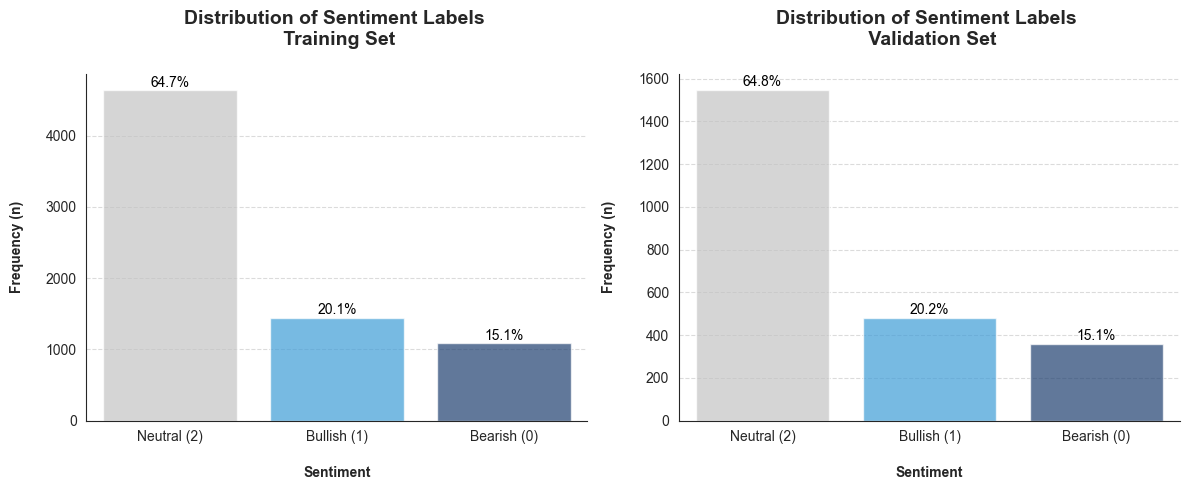

In [13]:
# Plot the distribution of sentiment labels in the training and validation sets
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Barplot for training set
sns.barplot(x=y_train.replace(sentiment_labels).value_counts().index,
            y=y_train.replace(sentiment_labels).value_counts().values,
            order=y_train.replace(sentiment_labels).value_counts().index,
            palette=sentiment_colors_labels,
            ax=axs[0], alpha=0.7)
axs[0].set_title('Distribution of Sentiment Labels \n Training Set\n', fontsize=14, fontweight='bold')
axs[0].set_xlabel('\nSentiment', fontweight='bold', fontsize=10)
axs[0].set_ylabel('Frequency (n)\n', fontweight='bold', fontsize=10)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of the bars
for i, v in enumerate(y_train.value_counts().values):
    percentage = (v / len(y_train)) * 100
    axs[0].text(i, v + 5, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Barplot for validation set
sns.barplot(x=y_val.replace(sentiment_labels).value_counts().index,
            y=y_val.replace(sentiment_labels).value_counts().values,
            order=y_val.replace(sentiment_labels).value_counts().index,
            palette=sentiment_colors_labels,
            ax=axs[1], alpha=0.7)
axs[1].set_title('Distribution of Sentiment Labels \n Validation Set\n', fontsize=14, fontweight='bold')
axs[1].set_xlabel('\nSentiment', fontweight='bold', fontsize=10)
axs[1].set_ylabel('Frequency (n)\n', fontweight='bold', fontsize=10)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of the bars
for i, v in enumerate(y_val.value_counts().values):
    percentage = (v / len(y_val)) * 100
    axs[1].text(i, v + 5, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Remove the top and right spines
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

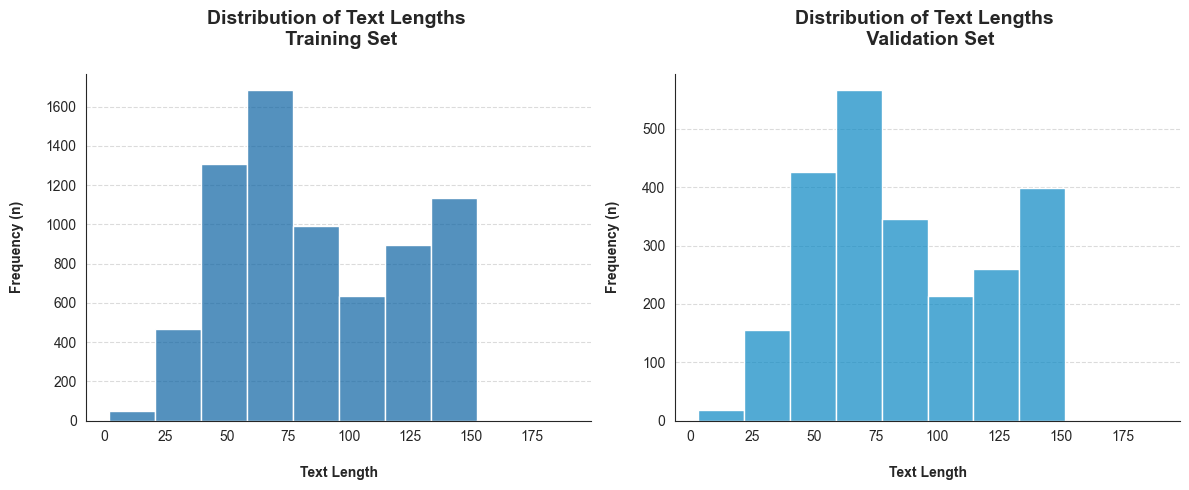

In [14]:
# Plot the distribution of text lengths in the training and validation sets
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram for training set
sns.histplot(X_train['text'].str.len(), bins=10, color=color_palette[2], ax=axs[0], alpha=0.7)
axs[0].set_title('Distribution of Text Lengths \n Training Set\n', fontsize=14, fontweight='bold')
axs[0].set_xlabel('\nText Length', fontweight='bold', fontsize=10)
axs[0].set_ylabel('Frequency (n)\n', fontweight='bold', fontsize=10)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for validation set
sns.histplot(X_val['text'].str.len(), bins=10, color=color_palette[3], ax=axs[1], alpha=0.7)
axs[1].set_title('Distribution of Text Lengths \n Validation Set\n', fontsize=14, fontweight='bold')
axs[1].set_xlabel('\nText Length', fontweight='bold', fontsize=10)
axs[1].set_ylabel('Frequency (n)\n', fontweight='bold', fontsize=10)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

---

## **🗂️ Feature Engineering**

### **[EXTRA 1] 🤗 Embeddings from Hugging Face Encoder [DeBERTa V3 Base](https://huggingface.co/sileod/deberta-v3-base-tasksource-nli)**

- We use the DeBERTa V3 Base model to obtain contextualized embeddings for our text data.
  - This model is pre-trained on a large corpus and fine-tuned for natural language understanding tasks **but not specifically for stock market sentiment**.

#### **Generate the embeddings with a Transformer Model**

- We will use the `transformers` library to load the model and generate embeddings for our text data.
    - To do this, we will use the `pipeline` function from the `transformers` library, with the `feature-extraction` task.
    - This will allow us to obtain the embeddings for each tweet in our dataset.
      - The embeddings will be generated for each tweet in the training and validation sets, resulting in a matrix of shape `(number_of_tweets, embedding_dimension)`.

<div style="background-color:#f9f9f9; border:2px solid #ccc; border-radius:8px; padding:16px;">

**Example of a Embedding Generation**

- **Original Text**: [CLS] The stock market is doing well today [SEP]
- **Model Input**: [CLS] [100, 200, 300, ...] [SEP]  (where each number represents a token ID)
- **Model Output**: [[0.1, -0.2, 0.3, ...], [0.4, -0.5, 0.6, ...], ...] (a list of vectors representing the text) with shape `(number_of_tweets, embedding_dimension)`.
  - **Embedding Dimension**: 768 (Corresponding to number of hidden units in the model)

</div>

In [15]:
# Function to generate CLS embeddings using a Hugging Face model
def generate_cls_embeddings(texts, embeddings_model, desc="Generating CLS Embeddings"):
    """
    Generates CLS token embeddings for a list of input texts.

    Args:
        texts (list of str): List of text inputs.
        embeddings_model (callable): A Hugging Face embedding pipeline or model that returns hidden states.
        desc (str): Description for the tqdm progress bar.

    Returns:
        List of torch.Tensor: CLS embeddings for each input text.
    """
    # List to hold CLS embeddings
    cls_embeddings = []
    
    # Iterate over each text input and generate CLS embeddings
    for text in tqdm(texts, desc=desc):
        
        # Generate embeddings using the provided model
        embeddings = embeddings_model(text)
        
        # Assuming output format is [ [ [CLS], token1, token2, ... ] ]
        # Extract the CLS token embedding (first token in the first batch)
        cls_embedding = torch.tensor(embeddings[0][0])
        
        # Append the CLS embedding to the list
        cls_embeddings.append(cls_embedding)
        
    # Return the list of CLS embeddings
    return cls_embeddings

In [16]:
# Define DeBERTa V3 Base model path
deberta_model_path = "sileod/deberta-v3-base-tasksource-nli"

# Load the pipeline for feature extraction
deberta_feature_extractor = pipeline("feature-extraction", model=deberta_model_path, tokenizer=deberta_model_path, device=device,
                                     padding=True, truncation=True)

# Generate CLS embeddings for the training set (using original text)
X_train_deberta = generate_cls_embeddings(
    X_train['text'].tolist(),
    embeddings_model=deberta_feature_extractor,
    desc="Generating CLS Embeddings for X_train"
)

# Generate CLS embeddings for the validation set (using original text)
X_val_deberta = generate_cls_embeddings(
    X_val['text'].tolist(),
    embeddings_model=deberta_feature_extractor,
    desc="Generating CLS Embeddings for X_val"
)

# Generate CLS embeddings for the test set (using original text)
X_test_deberta = generate_cls_embeddings(
    tweets_test_data['text'].tolist(),
    embeddings_model=deberta_feature_extractor,
    desc="Generating CLS Embeddings for tweets_test_data"
)

# Show the shape of the embeddings
print(f"\033[1mShape of DeBERTa embeddings for X_train: \033[0m{torch.stack(X_train_deberta).shape}")
print(f"\033[1mShape of DeBERTa embeddings for X_val: \033[0m{torch.stack(X_val_deberta).shape}")
print(f"\033[1mShape of DeBERTa embeddings for X_test: \033[0m{torch.stack(X_test_deberta).shape}")

Generating CLS Embeddings for tweets_test_data: 100%|██████████| 2388/2388 [02:10<00:00, 18.32it/s]

Shape of DeBERTa embeddings for X_train: torch.Size([7157, 768])
Shape of DeBERTa embeddings for X_val: torch.Size([2386, 768])
Shape of DeBERTa embeddings for X_test: torch.Size([2388, 768])


### **[EXTRA 2] 🤗 Embeddings from Hugging Face Encoder [FinTwitBERT-sentiment](https://huggingface.co/StephanAkkerman/FinTwitBERT-sentiment)**

- We use the FinTwitBERT model to obtain contextualized embeddings for our text data.
  - This model is **fine-tuned on financial tweets and fine-tuned for sentiment analysis tasks**, making it particularly suitable for our stock market sentiment analysis.

In [17]:
# Define FinTwitBERT-sentiment model path
FinTwitBERT_model_path = "StephanAkkerman/FinTwitBERT-sentiment"

# Load the pipeline for feature extraction
FinTwitBERT_feature_extractor = pipeline("feature-extraction", model=FinTwitBERT_model_path, tokenizer=FinTwitBERT_model_path, device=device,
                                         padding=True, truncation=True)

# Generate CLS embeddings for the training set using FinTwitBERT (using original text)
X_train_FinTwitBERT = generate_cls_embeddings(
    X_train['text'].tolist(),
    embeddings_model=FinTwitBERT_feature_extractor,
    desc="Generating CLS Embeddings for X_train using FinTwitBERT"
)

# Generate CLS embeddings for the validation set using FinTwitBERT (using original text)
X_val_FinTwitBERT = generate_cls_embeddings(
    X_val['text'].tolist(),
    embeddings_model=FinTwitBERT_feature_extractor,
    desc="Generating CLS Embeddings for X_val using FinTwitBERT"
)

# Generate CLS embeddings for the test set using FinTwitBERT (using original text)
X_test_FinTwitBERT = generate_cls_embeddings(
    tweets_test_data['text'].tolist(),
    embeddings_model=FinTwitBERT_feature_extractor,
    desc="Generating CLS Embeddings for tweets_test_data using FinTwitBERT"
)

# Show the shape of the embeddings
print(f"\033[1mShape of FinTwitBERT embeddings for X_train: \033[0m{torch.stack(X_train_FinTwitBERT).shape}")
print(f"\033[1mShape of FinTwitBERT embeddings for X_val: \033[0m{torch.stack(X_val_FinTwitBERT).shape}")
print(f"\033[1mShape of FinTwitBERT embeddings for X_test: \033[0m{torch.stack(X_test_FinTwitBERT).shape}")

Generating CLS Embeddings for X_train using FinTwitBERT: 100%|██████████| 7157/7157 [03:02<00:00, 39.24it/s]
Generating CLS Embeddings for X_val using FinTwitBERT: 100%|██████████| 2386/2386 [00:52<00:00, 45.14it/s]
Generating CLS Embeddings for tweets_test_data using FinTwitBERT: 100%|██████████| 2388/2388 [00:50<00:00, 47.38it/s]

Shape of FinTwitBERT embeddings for X_train: torch.Size([7157, 768])
Shape of FinTwitBERT embeddings for X_val: torch.Size([2386, 768])
Shape of FinTwitBERT embeddings for X_test: torch.Size([2388, 768])


---

# <span style="color: #ffffff;">4 & 5 | Modelling & Evaluation</span>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #24A3F1, #0B62A3, #113d7c, #000000);
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>4 & 5 | Modelling & Evaluation</b></h1></center>
</div>

<br><br>

In [18]:
# Function that will print the results of the classification report and the confusion matrix for both datasets (train and validation)
# Additionally, it will save results in a dictionary to compare the results of different models
def classification_metrics(model_name,
                           y_true_train, y_pred_train,
                           y_true_val, y_pred_val,
                           time_execution,
                           y_pred_train_proba=None, y_pred_val_proba=None,
                           classification_report_show=True):
    """Evaluate and display classification metrics using provided true and predicted labels.

    Handles both standard model predictions and pre-computed predictions (e.g., from Transformers or other models different from sklearn).
    Calculates AUROC only if prediction probabilities are provided.

    Args:
        model_name (str): The name of the model/approach being evaluated.
        y_true_train (array-like): True labels for the training set (numerical: 0, 1, 2).
        y_pred_train (array-like): Predicted labels for the training set (numerical: 0, 1, 2).
        y_true_val (array-like): True labels for the validation set (numerical: 0, 1, 2).
        y_pred_val (array-like): Predicted labels for the validation set (numerical: 0, 1, 2).
        time_execution (float or str): The time taken for prediction/training, for reporting.
        y_pred_train_proba (array-like, optional): Predicted probabilities for the training set (shape [n_samples, n_classes]). Defaults to None.
        y_pred_val_proba (array-like, optional): Predicted probabilities for the validation set (shape [n_samples, n_classes]). Defaults to None.
        classification_report_show (bool, optional): Whether to display the classification report. Defaults to True.

    Returns:
        tuple: A tuple containing two dictionaries:
            - models_results_train (dict): Dictionary with training metrics (Accuracy, Precision, Recall, F1 Score, AUROC).
            - models_results_val (dict): Dictionary with validation metrics (Accuracy, Precision, Recall, F1 Score, AUROC).
    """
    # Ensure inputs are numerical numpy arrays for scikit-learn compatibility
    y_true_train = np.asarray(y_true_train)
    y_pred_train = np.asarray(y_pred_train)
    y_true_val = np.asarray(y_true_val)
    y_pred_val = np.asarray(y_pred_val)

    # Create Text Labels for Display
    # Map numerical labels to text labels using the global dictionary
    y_true_train_text = pd.Series(y_true_train).map(sentiment_labels).values
    y_pred_train_text = pd.Series(y_pred_train).map(sentiment_labels).values
    y_true_val_text = pd.Series(y_true_val).map(sentiment_labels).values
    y_pred_val_text = pd.Series(y_pred_val).map(sentiment_labels).values
    
    # Define unique text labels based on true validation data for consistent ordering
    unique_text_labels = sorted(pd.Series(y_true_val).map(sentiment_labels).unique())

    # Initialize the dictionaries to store the results of the models
    models_results_train = {}
    models_results_val = {}

    # Display model name
    display_html(f'<h1 style="text-align: left; margin-bottom: -15px;">{model_name}</h1><br>', raw=True)

    # Calculate AUROC if probabilities are available
    auroc_train_score = 'N/A'
    auroc_val_score = 'N/A'
    
    # Check if probabilities are provided and have the correct shape
    if y_pred_train_proba is not None and y_pred_val_proba is not None:
        # Ensure probabilities are numpy arrays
        y_pred_train_proba = np.asarray(y_pred_train_proba)
        y_pred_val_proba = np.asarray(y_pred_val_proba)
    
        # Check if probabilities have the correct shape (n_samples, n_classes)
        # Assuming 3 classes (0, 1, 2)
        if y_pred_train_proba.shape[1] == 3 and y_pred_val_proba.shape[1] == 3:
             try:
                 auroc_train_score = round(roc_auc_score(y_true_train, y_pred_train_proba, multi_class='ovr'), 2)
                 auroc_val_score = round(roc_auc_score(y_true_val, y_pred_val_proba, multi_class='ovr'), 2)
             except ValueError as e:
                 print(f"Could not calculate AUROC: {e}") # Handle cases like only one class present
        else:
             print("Warning: Probabilities provided do not have shape (n_samples, 3). Cannot calculate AUROC.")

    # ----------------------------------- Classification Report  -----------------------------------
    # Display Classification Report of the *Hold-out Validation* - If classification_report_show=True
    if classification_report_show:
        print('___________________________________________________________________________________________________________')
        print('                                                     TRAIN                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        # Use text labels for the report display
        print(classification_report(y_true_train_text, y_pred_train_text,
                                    labels=unique_text_labels,      # Ensure consistent order
                                    zero_division=0))               # Set to 0 to report 0 instead of NaN/warning
        print(f'\nAUROC: {auroc_train_score}')

        print('___________________________________________________________________________________________________________')
        print('                                                VALIDATION                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        # Use text labels for the report display
        print(classification_report(y_true_val_text, y_pred_val_text,
                                    labels=unique_text_labels,      # Ensure consistent order
                                    zero_division=0))               # Set to 0 to report 0 instead of NaN/warning
        print(f'\nAUROC: {auroc_val_score}')

    # ----------------------------------- Confusion Matrix for Train and Validation side by side -----------------------------------
    # Confusion Matrix (Uses Text Labels for Readability)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    cm_train = confusion_matrix(y_true_train_text, y_pred_train_text, labels=unique_text_labels)
    sns.heatmap(cm_train, annot=True, annot_kws={"size": 10}, fmt='d', cmap='Blues', cbar=False,
                xticklabels=unique_text_labels, yticklabels=unique_text_labels, ax=ax[0])
    ax[0].set_title('Confusion Matrix [Train]\n', fontsize=12, fontweight='bold')
    ax[0].set_xlabel('\nPredicted', fontsize=10, fontweight='bold')
    ax[0].set_ylabel('True\n', fontsize=10, fontweight='bold')

    cm_val = confusion_matrix(y_true_val_text, y_pred_val_text, labels=unique_text_labels)
    sns.heatmap(cm_val, annot=True, annot_kws={"size": 10}, fmt='d', cmap='Blues', cbar=False,
                xticklabels=unique_text_labels, yticklabels=unique_text_labels, ax=ax[1])
    ax[1].set_title('Confusion Matrix [Validation]\n', fontsize=12, fontweight='bold')
    ax[1].set_xlabel('\nPredicted', fontsize=10, fontweight='bold')
    ax[1].set_ylabel('True\n', fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # ----------------------------------- Save the results in a dictionary -----------------------------------
    # Store Metrics (Calculated using Numerical Labels)
    models_results_train[model_name] = {
        'Time of Execution': round(time_execution, 2),
        'Accuracy': round(accuracy_score(y_true_train, y_pred_train), 2),
        'Precision': round(precision_score(y_true_train, y_pred_train, average='macro', zero_division=0), 2),
        'Recall': round(recall_score(y_true_train, y_pred_train, average='macro', zero_division=0), 2),
        'F1 Score (Macro)': round(f1_score(y_true_train, y_pred_train, average='macro', zero_division=0), 2),
        'AUROC': auroc_train_score # Store calculated or 'N/A'
    }

    models_results_val[model_name] = {
        'Accuracy': round(accuracy_score(y_true_val, y_pred_val), 2),
        'Precision': round(precision_score(y_true_val, y_pred_val, average='macro', zero_division=0), 2),
        'Recall': round(recall_score(y_true_val, y_pred_val, average='macro', zero_division=0), 2),
        'F1 Score (Macro)': round(f1_score(y_true_val, y_pred_val, average='macro', zero_division=0), 2),
        'AUROC': auroc_val_score # Store calculated or 'N/A'
    }
    
    # Return the results of the models
    return models_results_train, models_results_val

After completing all tests and evaluations, we will run the 3 best models to predict the sentiment of the tweets in the test set. Then we will ensemble the predictions from these models to create a final prediction (using a majority vote approach).

### **🏆 Best Models**
- **Original Text** with **Transformer-based [DeBERTa V3 Base](https://huggingface.co/sileod/deberta-v3-base-tasksource-nli)** encoder as *Feature Engineering* and **LSTM** as the *Model*.
- **Original Text** with **Transformer-based [FinTwitBERT-sentiment](https://huggingface.co/StephanAkkerman/FinTwitBERT-sentiment)** encoder as *Feature Engineering* and **LSTM** as the *Model*.
- **Original Text** with **Transformer-based [FinTwitBERT-sentiment](https://huggingface.co/StephanAkkerman/FinTwitBERT-sentiment)** encoder as *Feature Engineering* and *Model*.

## <span style="color: #ffffff;">LSTM (Long Short-Term Memory)</span>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: transparent;
            padding: 10px; color: white; border-radius: 300px; text-align: center;
            border: 2px solid #0B62A3;">
    <center><h2 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: #0B62A3;
                       font-size: 24px; font-family: 'Avenir Next LT Pro', sans-serif;"><b> LSTM (Long Short-Term Memory)</b></h2></center>
</div>

<br><br>

### **LSTM Model Architecture**

<div style="background-color:#f9f9f9; border:2px solid #ccc; border-radius:8px; padding:16px;">
    
    
- **Input Layer**: Takes the preprocessed text data.
  - For TF-IDF, the input is a static vector per tweet. 
  - For GloVe, DeBERTa, and FinTwitBERT, the input is a dense embedding vector, treated as a sequence of length 1 for simplicity. More complex sequence modeling (e.g., token-level sequences) is avoided due to the short nature of tweets and computational constraints.
- **Embedding Layer**: Converts words into dense vectors of fixed size.
- **LSTM Layer**: Captures long-term dependencies in the text.
- **Dense Layer**: Fully connected layer for classification.
- **Output Layer**: Softmax activation for multi-class classification (Bearish, Bullish, Neutral).

</div>
<br>

<center>
<img src="https://miro.medium.com/v2/resize:fit:680/1*sf4vCzcyycSe7GC3dZ2u2w.png" alt="LSTM Architecture" style="width: 600px; height: auto;">
</center>

<br>

### **LSTM Model Implementation**
- We will implement the LSTM model using ***Keras*** (and *PyTorch*), a high-level neural networks API, which allows us to build and train deep learning models easily.




In [19]:
# Create directories for saving model checkpoints and evaluation logs
os.makedirs("./ModelsEvaluation_FinalSolution/LSTM", exist_ok=True)         # exist_ok=True | Create directory if it doesn't exist
os.makedirs("./Predictions_FinalSolution", exist_ok=True)

In [20]:
# Define the LSTM Model Class
class LSTMModel(Model):
    def __init__(self, input_shape, lstm_units=64, dropout_rate=0.3, num_classes=3, padding=False):
        """
        Initialize the LSTM model for sentiment classification.
        
        Args:
            input_shape (tuple): Shape of the input data (e.g., (feature_dim,) for TF-IDF or embeddings).
            lstm_units (int): Number of LSTM units. Default: 64.
            dropout_rate (float): Dropout rate for regularization. Default: 0.3.
            num_classes (int): Number of output classes (Bearish, Bullish, Neutral). Default: 3.
        """
        super(LSTMModel, self).__init__()
        self.padding = padding  # Whether to use padding masking
        
        # Input layer with specified shape
        self.input_layer = Input(shape=input_shape, name='input')
        
        if padding:
            # Mask layer to avoid model from considering padding vectors
            self.mask_layer = Masking(mask_value=0)
           
        else:
            # Reshape input for LSTM (expects [batch, timesteps, features]) - Add a dimension for timesteps
            self.reshape = keras.layers.Reshape((1, input_shape[0]), name='reshape')
        
        # LSTM layer with specified units
        self.lstm = Bidirectional(LSTM(units=lstm_units, return_sequences=False), name='bidirectional_lstm')
        
        # Dropout layer for regularization
        self.dropout = Dropout(rate=dropout_rate, name='dropout')
        
        # Dense layer for classification
        self.dense = Dense(units=64, activation='relu', name='dense')
        
        # Output layer with softmax activation for multi-class classification
        self.output_layer = Dense(units=num_classes, activation='softmax', name='output')

    def call(self, inputs, training=False):
        """
        Forward pass of the model.
        
        Args:
            inputs: Input tensor.
            training (bool): Whether in training mode (affects dropout).
        
        Returns:
            Tensor: Model output (softmax probabilities).
        """
        # Apply mask if padding is used
        if self.padding:
            # Masking layer to ignore padding values
            x = self.mask_layer(inputs)
        else:
            # Reshape input for LSTM if padding is not used
            x = self.reshape(inputs)
        x = self.lstm(x)
        x = self.dropout(x, training=training)
        x = self.dense(x)
        return self.output_layer(x)

In [21]:
# Function to plot metrics
def plot_metrics(history, file_path=None, model_name=None):
    """Plots training and validation metrics.
    Args:
        history: Dictionary or Keras History object containing training metrics.
        file_path (str): Path to save the plot. If None, the plot is displayed only.
        model_name (str): Name of the model for the title.
    Returns:
        Shows the plot.
    """
    # Create a figure with 5 subplots (1 row, 5 columns)
    fig, ax = plt.subplots(1, 5, figsize=(20, 4))
    
    # Plot each metric (loss, accuracy, precision, recall, f1_score)
    metrics = [('loss', 'Loss'), ('accuracy', 'Accuracy'), ('precision', 'Precision'), 
               ('recall', 'Recall'), ('f1_score', 'F1 Score')]
    
    # Iterate through the metrics and plot them
    for i, (metric, title) in enumerate(metrics):
        
        # Check if history is a dictionary (like history_tfidf.history)
        ax[i].plot(history[metric], label='Train', color=color_palette[4])
        ax[i].plot(history[f'val_{metric}'], label='Val', color=color_palette[2])
        
        ax[i].set_title(title, fontsize=14, fontweight='bold')
        ax[i].set_xlabel('Epoch', fontsize=10, fontweight='bold')
        ax[i].set_ylabel(title, fontsize=10, fontweight='bold')
        ax[i].legend()
        
        # Format y-ticks: percentages for metrics other than loss, rounded for loss
        if metric != 'loss':
            ax[i].set_yticklabels([f'{int(t*100)}%' for t in ax[i].get_yticks()])
        else:
            ax[i].set_yticklabels([f'{t:.2f}' for t in ax[i].get_yticks()])
        
        # Remove the top and right spines
        sns.despine(ax=ax[i], top=True, right=True)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the figure if a file path is provided
    if file_path:
        fig.savefig(file_path, dpi=300, bbox_inches='tight')
    
    # Add a title if model_name is provided
    if model_name:
        plt.suptitle(f'Training and Validation Metrics\n{model_name}', fontsize=16, fontweight='bold', y=1.1)
    
    # Show the plot
    plt.show()

In [22]:
# Convert labels to one-hot encoded format
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)

# Show the shape of the one-hot encoded labels
print(f"\033[1mShape of One-Hot Encoded Labels for y_train: \033[0m{y_train_ohe.shape}")
print(f"\033[1mShape of One-Hot Encoded Labels for y_val: \033[0m{y_val_ohe.shape}")

# Display the first 5 rows of the one-hot encoded labels
print("\033[1m\nFirst 5 rows of One-Hot Encoded Labels for y_train:\033[0m")
print(y_train_ohe[:5])

Shape of One-Hot Encoded Labels for y_train: (7157, 3)
Shape of One-Hot Encoded Labels for y_val: (2386, 3)

First 5 rows of One-Hot Encoded Labels for y_train:
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


---

### **LSTM with Transformer-based Features ([FinTwitBERT-sentiment](https://huggingface.co/StephanAkkerman/FinTwitBERT-sentiment))**

- Same logic as the previous model, but using the FinTwitBERT model to obtain the embeddings.

#### **🧪 Model Training**

In [23]:
# ----------------------------------- [FinTwitBERT (Finetuned) + LSTM] -----------------------------------
# Start the timer for execution time
start_time = time.time()

# Initialize the LSTM model with FinTwitBERT input shape
input_shape_FinTwitBERT = (X_train_FinTwitBERT[0].shape[0],)  # (768,)

# Best combination of hyperparameters for FinTwitBERT: LSTM_FinTwitBERT_b64_u128_d0.3 (batch_size=64, lstm_units=128, dropout_rate=0.3)
lstm_FinTwitBERT = LSTMModel(input_shape=input_shape_FinTwitBERT, lstm_units=128, dropout_rate=0.3, num_classes=3, padding=False)

# Compile the model with the specified optimizer, loss function, and metrics
optimizer = Adam(learning_rate=0.001, weight_decay=0.01, name="Optimizer")                                        # Adam for faster convergence
loss = CategoricalCrossentropy(name="Loss")                                                                       # Suitable for multi-class one-hot labels
metrics = [CategoricalAccuracy(name="accuracy"), Precision(name="precision"), Recall(name="recall"), F1Score(average="macro", name="f1_score"), AUC(name="auc")]
lstm_FinTwitBERT.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Define the callbacks for the model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),                                         # Stop training if validation loss doesn't improve for 5 epochs
    CSVLogger(filename="./ModelsEvaluation_FinalSolution/LSTM/LSTM&FinTwitBERT_training_log.csv", append=False, separator=','),                # Log training history to a CSV file
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)                                        # Reduce learning rate if validation loss plateaus
]

# Train the model with the training data and validation data
history_FinTwitBERT = lstm_FinTwitBERT.fit(
    np.stack(X_train_FinTwitBERT), y_train_ohe,
    validation_data=(np.stack(X_val_FinTwitBERT), y_val_ohe),
    epochs=15,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

# Calculate the execution time and print it
train_time_FinTwitBERT = time.time() - start_time
print(f"\033[1mExecution Time: \033[0m{train_time_FinTwitBERT:.2f} seconds ({str(datetime.timedelta(seconds=train_time_FinTwitBERT))} h)")

Epoch 1/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.8409 - auc: 0.9514 - f1_score: 0.7876 - loss: 0.3954 - precision: 0.8822 - recall: 0.7994 - val_accuracy: 0.8965 - val_auc: 0.9803 - val_f1_score: 0.8665 - val_loss: 0.2684 - val_precision: 0.9075 - val_recall: 0.8885 - learning_rate: 0.0010
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9096 - auc: 0.9830 - f1_score: 0.8796 - loss: 0.2462 - precision: 0.9176 - recall: 0.9028 - val_accuracy: 0.8969 - val_auc: 0.9805 - val_f1_score: 0.8675 - val_loss: 0.2703 - val_precision: 0.9000 - val_recall: 0.8906 - learning_rate: 0.0010
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9189 - auc: 0.9862 - f1_score: 0.8954 - loss: 0.2204 - precision: 0.9258 - recall: 0.9107 - val_accuracy: 0.8998 - val_auc: 0.9821 - val_f1_score: 0.8724 - val_loss: 0.2576 - val_precision: 0.9085 - val_recall: 0.8944 - learning_rate: 0.0010
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9322 -

#### **📏 Model Evaluation**

In [24]:
# Predict on test set
y_pred_test_FinTwitBERT_proba = lstm_FinTwitBERT.predict(np.stack(X_test_FinTwitBERT), batch_size=32)
y_pred_test_FinTwitBERT = np.argmax(y_pred_test_FinTwitBERT_proba, axis=1)

# Save the predictions to a CSV file
FinTwitBERT_lstm_predictions_df = pd.DataFrame({
    'id': tweets_test_data['id'],
    'label': y_pred_test_FinTwitBERT
})
FinTwitBERT_lstm_predictions_df.to_csv("./Predictions_FinalSolution/1_LSTM&FinTwitBERT_TestPredictions.csv", index=False)

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


---

### **LSTM with Transformer-based Features ([DeBERTa V3 Base](https://huggingface.co/sileod/deberta-v3-base-tasksource-nli))**

- Since the output of the DeBERTa model is `(number_of_tweets, 768)`, where `768` is the embedding dimension, we already extracted the [CLS] token embedding for each tweet. This single vector, with a shape of `(768,)`, is a dense representation of the entire tweet's meaning. We have a single vector per tweet.
  - So, we will use this vector as input to the LSTM model and treat it as a sequence with a single timestep.

#### **🧪 Model Training**

In [25]:
X_train_deberta[0].shape[0]  # Check the shape of the DeBERTa embeddings

768

In [26]:
# ----------------------------------- [DeBERTa + LSTM] -----------------------------------
# Start the timer for execution time
start_time = time.time()

# Initialize the LSTM model with DeBERTa input shape
input_shape_deberta = (X_train_deberta[0].shape[0],)  # (768,)

# Since we don't hyper-tune DeBERTa, we will use the same hyperparameters as before  
lstm_deberta = LSTMModel(input_shape=input_shape_deberta, lstm_units=64, dropout_rate=0.3, num_classes=3, padding=False)

# Compile the model with the specified optimizer, loss function, and metrics
optimizer = Adam(learning_rate=0.001, weight_decay=0.01, name="Optimizer")                                        # Adam for faster convergence
loss = CategoricalCrossentropy(name="Loss")                                                                       # Suitable for multi-class one-hot labels
metrics = [CategoricalAccuracy(name="accuracy"), Precision(name="precision"), Recall(name="recall"), F1Score(average="macro", name="f1_score"), AUC(name="auc")]
lstm_deberta.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Define the callbacks for the model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),                                         # Stop training if validation loss doesn't improve for 5 epochs
    CSVLogger(filename="./ModelsEvaluation_FinalSolution/LSTM/LSTM&DeBERTa_training_log.csv", append=False, separator=','),      # Log training history to a CSV file
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)                                        # Reduce learning rate if validation loss plateaus
]

# Train the model with the training data and validation data
history_deberta = lstm_deberta.fit(
    np.stack(X_train_deberta), y_train_ohe,
    validation_data=(np.stack(X_val_deberta), y_val_ohe),
    epochs=25,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

# Calculate the execution time and print it
train_time_deberta = time.time() - start_time
print(f"\033[1mExecution Time: \033[0m{train_time_deberta:.2f} seconds ({str(datetime.timedelta(seconds=train_time_deberta))} h)")

Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.7484 - auc: 0.9028 - f1_score: 0.6410 - loss: 0.5852 - precision: 0.7939 - recall: 0.6926 - val_accuracy: 0.8248 - val_auc: 0.9503 - val_f1_score: 0.7767 - val_loss: 0.4240 - val_precision: 0.8338 - val_recall: 0.8160 - learning_rate: 0.0010
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8335 - auc: 0.9529 - f1_score: 0.7806 - loss: 0.4115 - precision: 0.8457 - recall: 0.8222 - val_accuracy: 0.8269 - val_auc: 0.9517 - val_f1_score: 0.7735 - val_loss: 0.4177 - val_precision: 0.8328 - val_recall: 0.8164 - learning_rate: 0.0010
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8418 - auc: 0.9585 - f1_score: 0.7953 - loss: 0.3879 - precision: 0.8522 - recall: 0.8297 - val_accuracy: 0.8319 - val_auc: 0.9545 - val_f1_score: 0.7778 - val_loss: 0.4100 - val_precision: 0.8344 - val_recall: 0.8256 - learning_rate: 0.0010
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.8494 -

#### **📏 Model Evaluation**

In [27]:
# Predict on test set
y_pred_test_deberta_proba = lstm_deberta.predict(np.stack(X_test_deberta), batch_size=32)
y_pred_test_deberta = np.argmax(y_pred_test_deberta_proba, axis=1)

# Save the predictions to a CSV file
deberta_lstm_predictions_df = pd.DataFrame({
    'id': tweets_test_data['id'],
    'label': y_pred_test_deberta
})
deberta_lstm_predictions_df.to_csv("./Predictions_FinalSolution/2_LSTM&DeBERTa_TestPredictions.csv", index=False)

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


## <span style="color: #ffffff;">[EXTRA 1 & 2] Transformer-based Encoder</span>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: transparent;
            padding: 10px; color: white; border-radius: 300px; text-align: center;
            border: 2px solid #0B62A3;">
    <center><h2 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: #0B62A3;
                       font-size: 24px; font-family: 'Avenir Next LT Pro', sans-serif;"><b> [EXTRA 1 & 2] Transformer-based Encoder</b></h2></center>
</div>

### **🟡 HuggingFace [FinTwitBERT-sentiment](https://huggingface.co/StephanAkkerman/FinTwitBERT-sentiment) Model**

In [28]:
# Define the classification pipeline
FinTwitBERT_model_path = "StephanAkkerman/FinTwitBERT-sentiment"
FinTwitBERT_model_classifier = pipeline("sentiment-analysis", model=FinTwitBERT_model_path, device=device)

# Define the classification function
# Source: https://huggingface.co/StephanAkkerman/FinTwitBERT-sentiment#usage
def FinTwitBERT_classify_sentiment(text):
    """
    Classifies a piece of text using FinTwitBERT and returns (label, score, probabilities).
    
    Args:
        text (str or list of str): The text(s) to classify.
            - If a single string is provided, it will be classified as a single instance.
            - If a list of strings is provided, each string will be classified separately.
                
    Returns:
        tuple: A tuple containing the label, score, and probabilities of the classification.
            - label (str): The predicted sentiment label (e.g., "Bearish", "Bullish", "Neutral").
            - score (float): The confidence score of the prediction.
            - probs (list): List of probabilities for each class [Neutral, Bullish, Bearish].
    """
    
    # Perform classification using the FinTwitBERT model
    outputs = FinTwitBERT_model_classifier(text, 
                                           return_all_scores=True)        # returns a list: [{'label': ..., 'score': ...}] 
    # print(outputs)                                                      # Debugging: Check the output format
    
    # Extract the list of label-score dicts
    result = outputs[0]                                 # Result is a list of dicts
    
    # Extract the highest scoring label and its score (top prediction)
    top_result = max(result, key=lambda x: x['score'])
    
    # Extract label, score of the top prediction
    label = top_result['label']                         # e.g., "Bearish", "Bullish", "Neutral"
    score = top_result['score']                         # Confidence score of the top prediction                     
    
    # Extract probabilities for each class in the order [Neutral, Bullish, Bearish]
    label_scores = {entry['label']: entry['score'] for entry in result}
    fixed_order_labels = ['NEUTRAL', 'BULLISH', 'BEARISH']         # Fixed order of labels
    probs = [label_scores[label] for label in fixed_order_labels]  # Probabilities in the correct order

    return label, score, probs

# Example usage of the classification function
sample_tweet = "📈 $AAPL looks bullish! Going to the moon! 🚀 Check out https://example.com @analyst predicts #stocks UP! It's amazing!!!"
label, score, proba = FinTwitBERT_classify_sentiment(sample_tweet)
print(f"\033[1mLabel:\033[0m {label}, \033[1mScore:\033[0m {score:.2f}, \033[1mProbabilities:\033[0m {proba}")

Label: BULLISH, Score: 1.00, Probabilities: [0.0002983910671900958, 0.9994373917579651, 0.00026423457893542945]


In [29]:
# ----------------------------------- [FinTwitBERT] -----------------------------------
# Start the timer for execution time
start_time = time.time()

# Apply the FinTwitBERT classification function to the 'text' column in the train corpus with tqdm
train_predictions = [
    FinTwitBERT_classify_sentiment(txt)
    for txt in tqdm(X_train['text'], desc="Predicting Train (FinTwitBERT)", unit=" tweet")
]
X_train['label_FinTwitBERT_str'], X_train['FinTwitBERT_score_pred'], X_train['FinTwitBERT_probs'] = zip(*train_predictions)

# Apply the FinTwitBERT classification function to the 'text' column in the validation corpus with tqdm
val_predictions = [
    FinTwitBERT_classify_sentiment(txt)
    for txt in tqdm(X_val['text'], desc="Predicting Validation (FinTwitBERT)", unit=" tweet")
]
X_val['label_FinTwitBERT_str'], X_val['FinTwitBERT_score_pred'], X_val['FinTwitBERT_probs'] = zip(*val_predictions)

# Apply the FinTwitBERT classification function to the 'text' column in the test corpus with tqdm
test_predictions = [
    FinTwitBERT_classify_sentiment(txt)
    for txt in tqdm(tweets_test_data['text'], desc="Predicting Test (FinTwitBERT)", unit=" tweet")
]
tweets_test_data['label_FinTwitBERT_str'], tweets_test_data['FinTwitBERT_score_pred'], tweets_test_data['FinTwitBERT_probs'] = zip(*test_predictions)

# Calculate the execution time and print it
train_time_FinTwitBERT = time.time() - start_time
print(f"\033[1mExecution Time: \033[0m{train_time_FinTwitBERT:.2f} seconds ({str(datetime.timedelta(seconds=train_time_FinTwitBERT))} h)")

Predicting Test (FinTwitBERT): 100%|██████████| 2388/2388 [00:48<00:00, 49.51 tweet/s]

Execution Time: 249.38 seconds (0:04:09.377391 h)


In [36]:
# Convert string labels to numerical labels for classification metrics
FinTwitBERT_labels_to_numeric = {'BEARISH': 0, 'BULLISH': 1, 'NEUTRAL': 2}  # Define mapping for FinTwitBERT

X_train['label_FinTwitBERT'] = X_train['label_FinTwitBERT_str'].map(FinTwitBERT_labels_to_numeric)                    # Train labels
X_val['label_FinTwitBERT'] = X_val['label_FinTwitBERT_str'].map(FinTwitBERT_labels_to_numeric)                        # Validation labels
tweets_test_data['label_FinTwitBERT'] = tweets_test_data['label_FinTwitBERT_str'].map(FinTwitBERT_labels_to_numeric)  # Test labels

# Save the predictions to a CSV file
FinTwitBERT_predictions_df = pd.DataFrame({
    'id': tweets_test_data['id'],
    'label': tweets_test_data['label_FinTwitBERT']
})
FinTwitBERT_predictions_df.to_csv('./Predictions_FinalSolution/3_FinTwitBERT_TestPredictions.csv', index=False)

---

## **🥇 Ensemble Model (Majority Voting)**

In [37]:
# Print all predictions files within the Predictions_FinalSolution directory
predictions_files = os.listdir('./Predictions_FinalSolution/')
print("\n\033[1mPredictions Files:\033[0m")
for file in predictions_files:
    print(f" - {file}")


Predictions Files:
 - 1_LSTM&FinTwitBERT_TestPredictions.csv
 - 2_LSTM&DeBERTa_TestPredictions.csv
 - 3_FinTwitBERT_TestPredictions.csv
 - MajorityVote_Ensemble_TestPredictions.csv


In [38]:
# Directory containing prediction files
predictions_dir = "./Predictions_FinalSolution/"

# List of prediction files
prediction_files = [
    "1_LSTM&FinTwitBERT_TestPredictions.csv",
    "2_LSTM&DeBERTa_TestPredictions.csv",
    "3_FinTwitBERT_TestPredictions.csv",
]

In [39]:
# Function to perform majority voting
def majority_vote(labels):
    """
    Returns the label with the most votes. In case of a tie, returns the first label encountered.
    
    Args:
        labels (list): List of labels for a single sample.
        
    Returns:
        int: The majority vote label.
    """
    vote_count = Counter(labels)
    max_count = max(vote_count.values())
    
    # Check for ties by counting how many labels have the max count
    tied_labels = [label for label, count in vote_count.items() if count == max_count]
    
    # If there is more than one label with the max count, return neutral (2)
    if len(tied_labels) > 1:
        return 2 # 'Neutral' label
    
    # Otherwise, return the label with the max count
    return tied_labels[0]

In [40]:
# Load and merge all prediction files
def load_predictions(files, directory):
    """
    Loads all prediction CSV files and merges them on 'id'.
    
    Args:
        files (list): List of prediction file names.
        directory (str): Path to the predictions directory.
        
    Returns:
        pd.DataFrame: Merged DataFrame with 'id' and labels from each model.
    """
    dfs = []
    for file in files:
        df = pd.read_csv(os.path.join(directory, file))
        model_name = file.replace("_TestPredictions.csv", "")
        df = df.rename(columns={"label": f"label_{model_name}"})
        dfs.append(df[["id", f"label_{model_name}"]])
    
    # Merge all DataFrames on 'id'
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = merged_df.merge(df, on="id", how="outer")
    
    return merged_df

# Perform majority voting
def compute_majority_vote(merged_df):
    """
    Computes majority vote for each sample in the merged DataFrame.
    
    Args:
        merged_df (pd.DataFrame): DataFrame with 'id' and label columns from each model.
        
    Returns:
        pd.DataFrame: DataFrame with 'id' and 'label' (majority vote result).
    """
    # Get label columns (all columns except 'id')
    label_columns = [col for col in merged_df.columns if col.startswith("label_")]
    
    # Initialize result DataFrame
    result = pd.DataFrame({"id": merged_df["id"], "label": None})
    
    # Compute majority vote for each row
    for idx in tqdm(range(len(merged_df)), desc="Computing Majority Vote"):
        labels = merged_df.iloc[idx][label_columns].dropna().astype(int).tolist()
        result.at[idx, "label"] = majority_vote(labels)
    
    result["label"] = result["label"].astype(int)
    return result

# Load predictions from specified files and compute majority vote
merged_predictions = load_predictions(prediction_files, predictions_dir)
ensemble_predictions = compute_majority_vote(merged_predictions)

# Save ensemble predictions to CSV
output_file = "./Predictions_FinalSolution/MajorityVote_Ensemble_TestPredictions.csv"
ensemble_predictions.to_csv(output_file, index=False)

# Display summary of predictions
print("\n\033[1mEnsemble Predictions_FinalSolution Summary:\033[0m")
pd.DataFrame({
    'n': ensemble_predictions["label"].value_counts().rename({0: "Bearish", 1: "Bullish", 2: "Neutral"}),
    '%': round(ensemble_predictions["label"].value_counts(normalize=True).rename({0: "Bearish", 1: "Bullish", 2: "Neutral"}) * 100, 1)
})

Computing Majority Vote: 100%|██████████| 2388/2388 [00:01<00:00, 1780.65it/s]


Ensemble Predictions_FinalSolution Summary:


,n,%
label,,
Neutral,1531,64.1
Bullish,467,19.6
Bearish,390,16.3


In [41]:
# Generate predictions for training and validation sets
# Model 1: LSTM with FinTwitBERT
y_pred_train_FinTwitBERT_proba = lstm_FinTwitBERT.predict(np.stack(X_train_FinTwitBERT), batch_size=32)
y_pred_train_FinTwitBERT = np.argmax(y_pred_train_FinTwitBERT_proba, axis=1)
y_pred_val_FinTwitBERT_proba = lstm_FinTwitBERT.predict(np.stack(X_val_FinTwitBERT), batch_size=32)
y_pred_val_FinTwitBERT = np.argmax(y_pred_val_FinTwitBERT_proba, axis=1)

# Model 2: LSTM with DeBERTa
y_pred_train_deberta_proba = lstm_deberta.predict(np.stack(X_train_deberta), batch_size=32)
y_pred_train_deberta = np.argmax(y_pred_train_deberta_proba, axis=1)
y_pred_val_deberta_proba = lstm_deberta.predict(np.stack(X_val_deberta), batch_size=32)
y_pred_val_deberta = np.argmax(y_pred_val_deberta_proba, axis=1)

# Model 3: FinTwitBERT-sentiment

y_pred_train_FinTwitBERT_direct = X_train['label_FinTwitBERT'].values
y_pred_val_FinTwitBERT_direct = X_val['label_FinTwitBERT'].values

# Create DataFrames with predictions
train_predictions_df = pd.DataFrame({
    'id': X_train.index,
    'label_LSTM&FinTwitBERT': y_pred_train_FinTwitBERT,
    'label_LSTM&DeBERTa': y_pred_train_deberta,
    'label_FinTwitBERT': y_pred_train_FinTwitBERT_direct
})

val_predictions_df = pd.DataFrame({
    'id': X_val.index,
    'label_LSTM&FinTwitBERT': y_pred_val_FinTwitBERT,
    'label_LSTM&DeBERTa': y_pred_val_deberta,
    'label_FinTwitBERT': y_pred_val_FinTwitBERT_direct
})

# Compute ensemble predictions
ensemble_train_predictions = compute_majority_vote(train_predictions_df)
ensemble_val_predictions = compute_majority_vote(val_predictions_df)

224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


Computing Majority Vote: 100%|██████████| 2386/2386 [00:01<00:00, 2336.91it/s]


Ensemble Model (Majority Voting)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Bearish (0)       0.85      0.91      0.88      1082
 Bullish (1)       0.90      0.89      0.89      1442
 Neutral (2)       0.96      0.94      0.95      4633

    accuracy                           0.93      7157
   macro avg       0.90      0.91      0.91      7157
weighted avg       0.93      0.93      0.93      7157


AUROC: N/A
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------

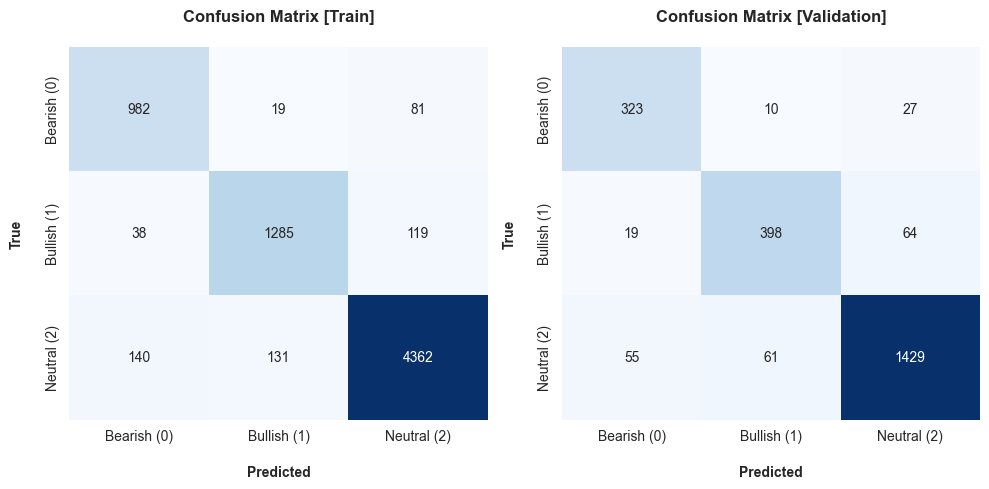

Classification Metrics | Ensemble Model (Majority Voting) Training Data 
 
 
 
 Time of Execution 
 Accuracy 
 Precision 
 Recall 
 F1 Score (Macro) 
 AUROC 
 
 
 
 
 Ensemble Model (Majority Voting) 
 0 
 0.93 
 0.9 
 0.91 
 0.91 
 N/A 
 
 
 Validation Data 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score (Macro) 
 AUROC 
 
 
 
 
 Ensemble Model (Majority Voting) 
 0.9 
 0.87 
 0.88 
 0.87 
 N/A

In [42]:
# Evaluate ensemble model using classification_metrics function
ensemble_train_results, ensemble_val_results = classification_metrics(
    'Ensemble Model (Majority Voting)',
    y_train, ensemble_train_predictions['label'],
    y_val, ensemble_val_predictions['label'],
    time_execution=0,
    y_pred_train_proba=None,
    y_pred_val_proba=None,
    classification_report_show=True
)

# Display results
display_side_by_side(
    pd.DataFrame(ensemble_train_results).T,
    pd.DataFrame(ensemble_val_results).T,
    titles=['Training Data', 'Validation Data'],
    super_title='Classification Metrics | Ensemble Model (Majority Voting)'
)

---

# **🔗 Bibliography/References**


**[[1]](https://smartasset.com/financial-advisor/bullish-vs-bearish)** Reed, Eric. “Bullish vs. Bearish: What’s the Difference?” SmartAsset, 16 Mar. 2021, smartasset.com/financial-advisor/bullish-vs-bearish.